In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline
import math

In [2]:
delta = 0.01
L = 6. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)

In [6]:
def V(z):
    return z**2

V_mat = np.zeros([2 * N + 1, 2 * N + 1])
for i in range(-N,N+1):
    V_mat[i + N, i + N] = V(delta*i)
print(V_mat)
I_0 = np.identity(2*N+1)
I_minus1 = np.zeros([2 * N + 1, 2 * N + 1])
I_plus1 = np.zeros([2 * N + 1, 2 * N + 1])
for i in range(2*N+1):
    if i == 0:
        I_plus1[i, i+1] = 1
    elif i == 2*N:
        I_minus1[i, i-1] = 1
    else: 
        I_plus1[i, i+1] = 1
        I_minus1[i, i-1] = 1
print(I_plus1) 
print(I_minus1) 

A = (I_plus1 - 2 * I_0 + I_minus1) / (delta) ** 2
print(A)
B = (I_plus1 + 10 * I_0 + I_minus1) / 12

[[36.      0.      0.     ...  0.      0.      0.    ]
 [ 0.     35.8801  0.     ...  0.      0.      0.    ]
 [ 0.      0.     35.7604 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ... 35.7604  0.      0.    ]
 [ 0.      0.      0.     ...  0.     35.8801  0.    ]
 [ 0.      0.      0.     ...  0.      0.     36.    ]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[-20000.  10000.      0. ...      0.      0.      0.]
 [ 10000. -20000.  10000. ...      0.      0.      0.]
 [     0.  10000. -20000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -20000.  10000.      0.]
 [     0.      0.      0. ...  10000. -20000.  10000.]
 [     0.      0.      0. ...      0.  10000. -20000.]]


In [4]:
H = -np.dot(np.linalg.inv(B),A) + V_mat
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectorsb

In [5]:
potential = np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

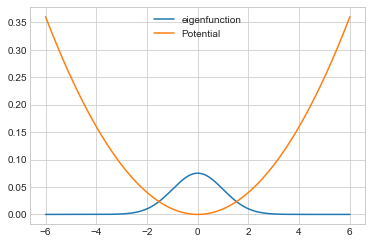

In [10]:
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, 0.01 * potential, label="Potential")
plt.legend();

In [12]:
psi[1]

2.558835322304587e-10

In [9]:
np.dot(psi.conj().T, psi) # Normalization check 

1.0

In [72]:
energy_eigenvalue = H_eigenvalues[1]
print(energy_eigenvalue) 

2.9999999994597273


## Crystal (Translationally Invariant/Periodic Potential)

In [81]:
delta = 0.01
L = 15. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 100

In [83]:
def V(z):
    return -V0 if (math.floor(z) % 2 == 0) else 0

V_mat = np.zeros([2 * N + 1, 2 * N + 1])
for i in range(-N,N+1):
    V_mat[i + N, i + N] = V(delta*i)

I_0 = np.identity(2*N+1)
I_minus1 = np.zeros([2 * N + 1, 2 * N + 1])
I_plus1 = np.zeros([2 * N + 1, 2 * N + 1])
for i in range(2*N+1):
    if i == 2*N:
        I_plus1[i, 0] = 1
        I_minus1[i, i-1] = 1
    else:
        I_plus1[i, i+1] = 1
        I_minus1[i, i-1] = 1
    
A = (I_plus1 - 2 * I_0 + I_minus1) / (delta) ** 2
B = (I_plus1 + 10 * I_0 + I_minus1) / 12

In [84]:
H = -np.dot(np.linalg.inv(B),A) + V_mat
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectorsb

In [85]:
potential = 0.01 * np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

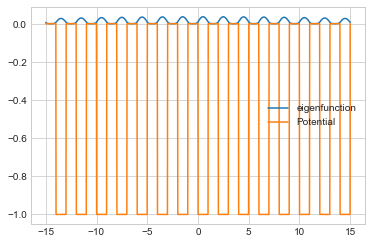

In [86]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

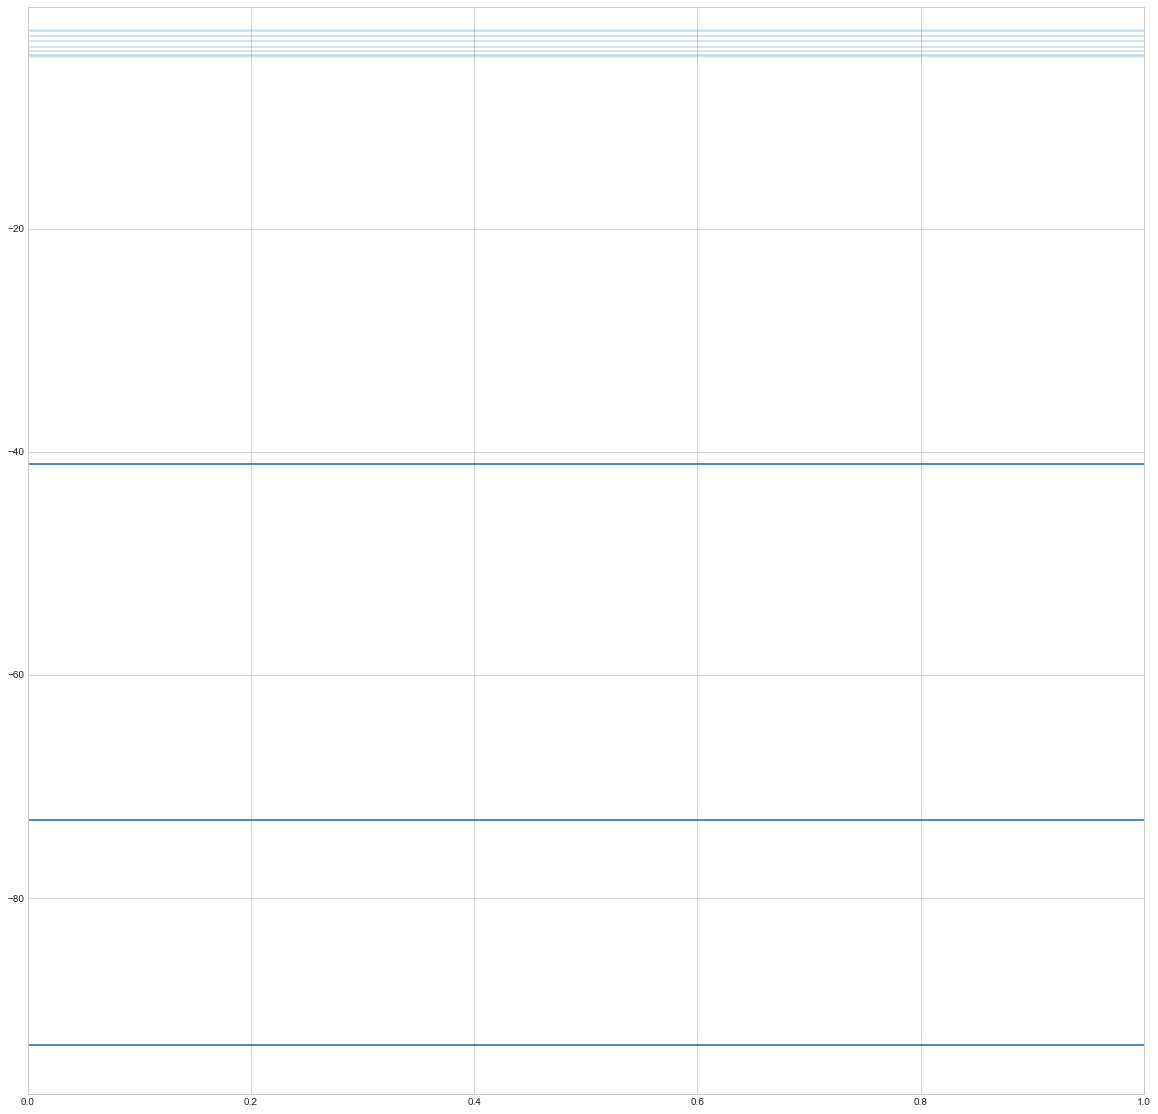

In [87]:
fig=plt.figure(figsize=(20,20))
for i in range(len(H_eigenvalues)):
    if H_eigenvalues[i] <= 0: 
        #plt.plot(i, H_eigenvalues[i], 'o')
        plt.axhline(H_eigenvalues[i], lw=0.2)
    else:
        break